In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
34/36 [===========================>..] - ETA: 0s - loss: 1.4678 - accuracy: 0.2318 
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 1s 8ms/step - loss: 1.4646 - accuracy: 0.2327 - val_loss: 1.3585 - val_accuracy: 0.3631
Epoch 2/1000
32/36 [=========================>....] - ETA: 0s - loss: 1.3457 - accuracy: 0.3083
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.3452 - accuracy: 0.3080 - val_loss: 1.2861 - val_accuracy: 0.4157
Epoch 3/1000
32/36 [=========================>....] - ETA: 0s - loss: 1.3075 - accuracy: 0.3484
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.3057 - accuracy: 0.3498 - val_loss: 1.2413 - val_accuracy: 0.4211
Epoch 4/1000
33/36 [==========================>...] - ETA: 0s - loss: 1.2719 - accur

Epoch 28/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.7078 - accuracy: 0.7245
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.7249 - val_loss: 0.3932 - val_accuracy: 0.9287
Epoch 29/1000
35/36 [============================>.] - ETA: 0s - loss: 0.7195 - accuracy: 0.7141
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7190 - accuracy: 0.7142 - val_loss: 0.3868 - val_accuracy: 0.9314
Epoch 30/1000
35/36 [============================>.] - ETA: 0s - loss: 0.7029 - accuracy: 0.7208
Epoch 00030: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.7213 - val_loss: 0.3793 - val_accuracy: 0.9274
Epoch 31/1000
36/36 [==============================] - ETA: 0s - loss: 0.6922 - ac

Epoch 55/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.6124 - accuracy: 0.7623
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7607 - val_loss: 0.2854 - val_accuracy: 0.9454
Epoch 56/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.5815 - accuracy: 0.7771
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7753 - val_loss: 0.2789 - val_accuracy: 0.9474
Epoch 57/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7812
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7764 - val_loss: 0.2828 - val_accuracy: 0.9480
Epoch 58/1000
35/36 [============================>.] - ETA: 0s - loss: 0.5886 - ac

Epoch 82/1000
27/36 [=====================>........] - ETA: 0s - loss: 0.5579 - accuracy: 0.7975
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.5529 - accuracy: 0.7951 - val_loss: 0.2554 - val_accuracy: 0.9680
Epoch 83/1000
27/36 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7896
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.5399 - accuracy: 0.7900 - val_loss: 0.2565 - val_accuracy: 0.9634
Epoch 84/1000
29/36 [=======================>......] - ETA: 0s - loss: 0.5464 - accuracy: 0.7931
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7896 - val_loss: 0.2522 - val_accuracy: 0.9647
Epoch 85/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.5424 - ac

Epoch 109/1000
35/36 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.8087
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.8078 - val_loss: 0.2448 - val_accuracy: 0.9654
Epoch 110/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.5189 - accuracy: 0.8100
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.8040 - val_loss: 0.2445 - val_accuracy: 0.9640
Epoch 111/1000
36/36 [==============================] - ETA: 0s - loss: 0.5267 - accuracy: 0.8016
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.8016 - val_loss: 0.2518 - val_accuracy: 0.9660
Epoch 112/1000
36/36 [==============================] - ETA: 0s - loss: 0.5144 

Epoch 136/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.4976 - accuracy: 0.8156
Epoch 00136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.8147 - val_loss: 0.2346 - val_accuracy: 0.9694
Epoch 137/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5696 - accuracy: 0.7891
Epoch 00137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.8127 - val_loss: 0.2306 - val_accuracy: 0.9667
Epoch 138/1000
36/36 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8098
Epoch 00138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.8098 - val_loss: 0.2399 - val_accuracy: 0.9614
Epoch 139/1000
35/36 [============================>.] - ETA: 0s - loss: 0.4891 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.9627


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.01535134e-03 9.19935465e-01 7.49310255e-02 1.18236545e-04]
1


# 混同行列

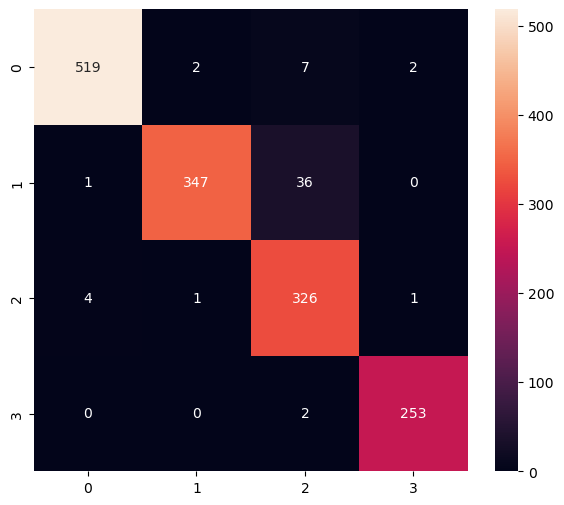

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       530
           1       0.99      0.90      0.95       384
           2       0.88      0.98      0.93       332
           3       0.99      0.99      0.99       255

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.97      0.96      0.96      1501



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6232

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.01535507e-03 9.19935346e-01 7.49310404e-02 1.18236756e-04]
1
